In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.max_iterations):
            y_pred = self._predict(X)
            cost = self._compute_cost(y, y_pred)
            dw, db = self._compute_gradients(X, y, y_pred)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.cost_history.append(cost)
    
    def _predict(self, X):
        return X @ self.weights + self.bias
    
    def _compute_cost(self, y_true, y_pred):
        return np.mean((y_pred - y_true) ** 2)
    
    def _compute_gradients(self, X, y_true, y_pred):
        n = X.shape[0]
        dw = (1/n) * X.T @ (y_pred - y_true)
        db = (1/n) * np.sum(y_pred - y_true)
        return dw, db
    
    def predict(self, X):
        return self._predict(X)

Train MSE: 70.79
Test MSE: 107.62
Learned weights: [44.49993775]
Learned bias: 0.86


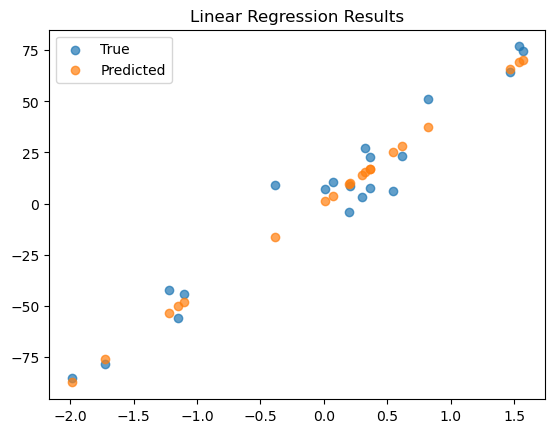

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train our model
model = LinearRegressionFromScratch(learning_rate=0.01, max_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate
train_mse = np.mean((y_pred_train - y_train) ** 2)
test_mse = np.mean((y_pred_test - y_test) ** 2)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Learned weights: {model.weights}")
print(f"Learned bias: {model.bias:.2f}")

# Visualize results
plt.scatter(X_test, y_test, alpha=0.7, label='True')
plt.scatter(X_test, y_pred_test, alpha=0.7, label='Predicted')
plt.legend()
plt.title('Linear Regression Results')
plt.show()

**R² Score (Coefficient of Determination)**

* **Definition:**

  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$

  It compares your model’s performance to a **baseline model** that always predicts the mean ($\bar{y}$).

* **Range:**
  $(-\infty, 1]$

  * $R^2 = 1$: perfect prediction
  * $R^2 = 0$: no better than predicting the mean
  * $R^2 < 0$: worse than the mean predictor

* **Interpretation:**

  * Explains how much of the **variance** in the data your model captures.
  * Example: $R^2 = 0.85$ → 85% of the variance in the data is explained by the model.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegressionFromScratch(learning_rate=0.1)
model.fit(X, y)
y_pred = model.predict(X)

# Scikit-learn
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)
sklearn_pred = sklearn_model.predict(X)

# Results typically match very closely!
print(f"Our R²: {r2_score(y, y_pred):.4f}")
print(f"Sklearn R²: {r2_score(y, sklearn_pred):.4f}")

Our R²: 0.9538
Sklearn R²: 0.9538
